In [ ]:
import numpy as np
import pandas as pd

In [ ]:
groceries_df = pd.read_csv("Groceries_dataset (1).csv")

In [ ]:
groceries_df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
len(groceries_df)

38765

In [ ]:
#check if no of members
len(groceries_df["Member_number"].value_counts())

3898

In [ ]:
analysis_df = groceries_df[["Member_number","itemDescription",'Date']].groupby(["Member_number","itemDescription"])\
              .count().reset_index().rename(columns={'Date': 'count'})

analysis_df.head()

,Member_number,itemDescription,count
0,1000,canned beer,1
1,1000,hygiene articles,1
2,1000,misc. beverages,1
3,1000,pastry,1
4,1000,pickled vegetables,1


In [ ]:
analysis_df[analysis_df["count"]>4]

,Member_number,itemDescription,count
3136,1363,whole milk,5
12065,2390,other vegetables,6
16170,2861,whole milk,5
22322,3582,whole milk,5
33694,4864,whole milk,5


In [ ]:
analysis_df = analysis_df.rename(index=str, #renaming column names
                               columns={"Member_number": "member_id", "itemDescription": "item"})


In [ ]:
analysis_df.head()

,member_id,item,count
0,1000,canned beer,1
1,1000,hygiene articles,1
2,1000,misc. beverages,1
3,1000,pastry,1
4,1000,pickled vegetables,1


In [ ]:
len(analysis_df["item"].value_counts())

167

In [ ]:
# Define the categories
categories =  {'Fresh Produce': [
        'tropical fruit', 'pip fruit', 'other vegetables', 'citrus fruit', 'root vegetables',
        'berries', 'herbs', 'grapes', 'onions', 'potato products', 'specialty vegetables',
        'leafy greens', 'mushrooms', 'cucumbers', 'tomatoes', 'bell peppers', 'zucchini',
        'eggplant', 'chili peppers', 'garlic', 'corn', 'peas', 'radishes', 'leeks', 'squash'
    ],
    'Dairy and Eggs': [
        'whole milk', 'butter', 'butter milk', 'yogurt', 'curd cheese', 'processed cheese',
        'curd', 'hard cheese', 'cream cheese', 'UHT-milk', 'domestic eggs', 'margarine',
        'whipped/sour cream', 'sliced cheese', 'specialty cheese', 'spread cheese',
        'soft cheese', 'egg substitutes', 'soy milk', 'almond milk', 'lactose-free milk'
    ],
    'Bakery and Cereals': [
        'rolls/buns', 'brown bread', 'pastry', 'baking powder', 'white bread',
        'semi-finished bread', 'zwieback', 'waffles', 'long life bakery product', 'cereals',
        'cake bar', 'rye bread', 'whole grain bread', 'english muffins', 'bagels', 'croissants',
        'pancakes', 'tortillas', 'crackers', 'oatmeal'
    ],
    'Meats and Seafood': [
        'beef', 'frankfurter', 'chicken', 'hamburger meat', 'pork', 'ham', 'turkey', 'fish',
        'meat', 'frozen fish', 'canned fish', 'liver loaf', 'organic sausage', 'meat spreads',
        'bacon', 'salami', 'shellfish', 'crab', 'lobster', 'shrimp', 'veal', 'lamb', 'duck'
    ],
    'Beverages': [
        'fruit/vegetable juice', 'canned beer', 'coffee', 'misc. beverages', 'red/blush wine',
        'soda', 'sparkling wine', 'bottled beer', 'white wine', 'liquor', 'liquor (appetizer)',
        'prosecco', 'brandy', 'rum', 'liqueur', 'cocoa drinks', 'tea', 'energy drinks',
        'sports drinks', 'green tea', 'herbal tea', 'water'
    ], 'Pantry and Dry Goods': [
        'packaged fruit/vegetables', 'chocolate', 'specialty bar', 'flour', 'sugar',
        'pasta', 'condensed milk', 'candy', 'salt', 'oil', 'vinegar', 'nuts/prunes',
        'canned vegetables', 'chewing gum', 'canned fruit', 'spices', 'napkins', 'sauces',
        'sweet spreads', 'soups', 'mustard', 'specialty fat', 'instant coffee', 'snack products',
        'mayonnaise', 'jam', 'rice', 'pudding powder', 'ready soups', 'preservation products',
        'dessert', 'specialty chocolate'
    ],
    'Frozen and Refrigerated': [
        'frozen potato products', 'frozen vegetables', 'frozen chicken', 'frozen dessert',
        'frozen fruits', 'frozen meals', 'ice cream'
    ],
    'Household and Pet': [
        'pot plants', 'dog food', 'hair spray', 'photo/film', 'shopping bags', 'dish cleaner',
        'pet care', 'female sanitary products', 'cling film/bags', 'soap', 'house keeping products',
        'decalcifier', 'cat food', 'bathroom cleaner', 'dental care', 'roll products', 'kitchen towels',
        'flower soil/fertilizer', 'dishes', 'male cosmetics', 'candles', 'tidbits', 'cooking chocolate',
        'seasonal products', 'abrasive cleaner', 'syrup', 'ketchup', 'cream', 'skin care',
        'rubbing alcohol', 'softener', 'organic products', 'kitchen utensil', 'flower (seeds)',
        'salad dressing', 'make up remover', 'toilet cleaner', 'detergent', 'cleaner', 'light bulbs',
        'hygiene articles', 'baby cosmetics'
    ],
    'Miscellaneous': [
        'bottled water', 'sausage', 'newspapers', 'popcorn', 'beverages', 'bags', 'honey',
        'nut snack'
    ]
}


# Map each product to its category
item_to_group = {}
for category, items in categories.items():
    for item in items:
        item_to_group[item] = category

# Now we have a mapping of products to their categories
item_description = [
    "tropical fruit", "whole milk", "pip fruit", "other vegetables", "rolls/buns", "pot plants",
    # ... (continues with the rest of the items)
]

# Create the category variable for each item description
category_variable = [item_to_group.get(item, 'Miscellaneous') for item in item_description]

# Display the full mapping of 'ItemDescription' to the new category variable
item_description_to_category = list(zip(item_description, category_variable))
item_description_to_category[:10]  # Show only the first 10 items for brevity

# Assuming 'df' is the DataFrame that contains the 'ItemDescription' column.
# We'll need to create a function to map each item description to its category, using the 'item_to_group' dictionary.

def map_item_to_category(item):
    return item_to_group.get(item, 'Miscellaneous')

# Now, let's apply this function to the 'ItemDescription' column to create a new 'category_variable' column
# I'll mock a small DataFrame here as an example.
import pandas as pd

# This assumes 'df' is your full DataFrame that contains 'ItemDescription' and other columns you want to keep.
analysis_df['item_category'] = analysis_df['item'].apply(map_item_to_category)

In [ ]:
analysis_df.head()

,member_id,item,count,item_category
0,1000,canned beer,1,Beverages
1,1000,hygiene articles,1,Household and Pet
2,1000,misc. beverages,1,Beverages
3,1000,pastry,1,Bakery and Cereals
4,1000,pickled vegetables,1,Miscellaneous


# Recommendation System

In [ ]:
analysis_df_bkp = analysis_df.__deepcopy__()

Create Out of Sample Set for Model Testing

In [ ]:
n_rows_10_percent = int(len(analysis_df) * 0.05)
n_rows_90_percent = len(analysis_df) - n_rows_10_percent

# Select 10% of the data at random
df_10_percent = analysis_df.sample(n=n_rows_10_percent, random_state=142)

# Remove the selected rows from the original DataFrame to get the remaining 90%
analysis_df = analysis_df.drop(df_10_percent.index)

# Print the lengths of both DataFrames to verify the split
print("10% DataFrame length:", len(df_10_percent))
print("90% DataFrame length:", len(analysis_df))

10% DataFrame length: 1738
90% DataFrame length: 33028


Plot Network for Top 10 Customers

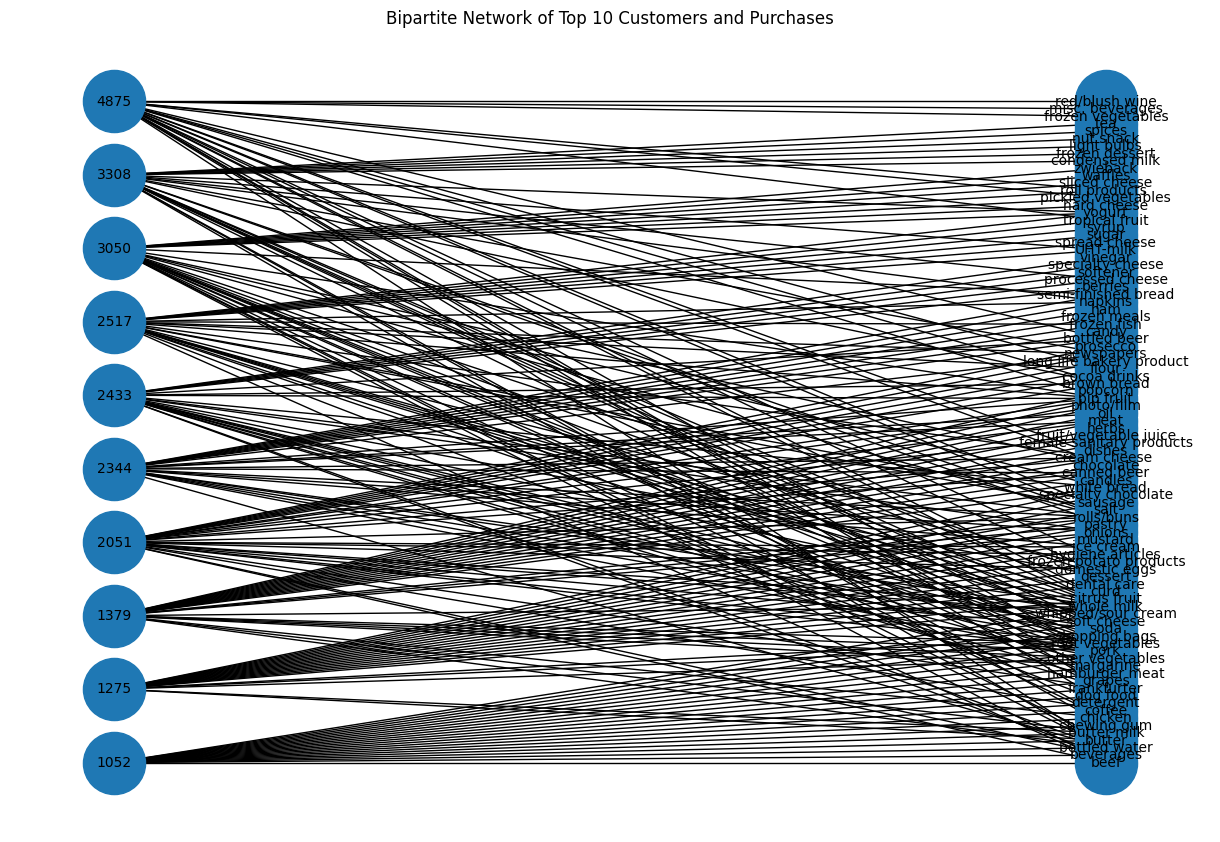

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


# Get the top 10 customers based on their purchase frequency
top_10_customers = analysis_df.groupby('member_id')['item'].count().nlargest(10).index

# Filter the DataFrame to include only the top 10 customers
top_10_df = analysis_df[analysis_df['member_id'].isin(top_10_customers)]

# Create a new bipartite graph
G_top_10 = nx.Graph()

# Add nodes for top 10 members and purchases
top_10_members = top_10_df['member_id'].unique()
top_10_purchases = top_10_df['item'].unique()
G_top_10.add_nodes_from(top_10_members, bipartite=0)
G_top_10.add_nodes_from(top_10_purchases, bipartite=1)

# Add edges between top 10 members and purchases
for idx, row in top_10_df.iterrows():
    member = row['member_id']
    purchases = row['item'].split(', ')
    for purchase in purchases:
        G_top_10.add_edge(member, purchase)

# Visualize the bipartite graph for top 10 customers
plt.figure(figsize=(12, 8))
pos_top_10 = nx.bipartite_layout(G_top_10, top_10_members)
nx.draw(G_top_10, pos_top_10, with_labels=True, node_size=2000, font_size=10)
plt.title('Bipartite Network of Top 10 Customers and Purchases')
plt.show()

Build System Using the Neighbours Approach

In [ ]:
import networkx as nx

# Assuming you already have a bipartite graph G_top_10

# Find neighbors of a node (customer or purchase)
def find_neighbors(node,G):
    return list(G.neighbors(node))

# Find intersection between neighbors of two nodes
def find_intersection(node1, node2, G):
    neighbors1 = set(find_neighbors(node1,G))
    neighbors2 = set(find_neighbors(node2,G))
    return neighbors1.intersection(neighbors2)

# Find difference between neighbors of two nodes
def find_difference(node1, node2, G):
    neighbors1 = set(find_neighbors(node1, G))
    neighbors2 = set(find_neighbors(node2, G))
    return neighbors1.difference(neighbors2) - neighbors2.difference(neighbors1)

In [ ]:
G = nx.Graph()

all_members = analysis_df['member_id'].unique()
all_purchases = analysis_df['item'].unique()
G.add_nodes_from(all_members, bipartite=0)
G.add_nodes_from(all_purchases, bipartite=1)
G.add_weighted_edges_from([(row['member_id'], row['item'], row['count']) for idx, row in analysis_df.iterrows()])

'''
# Add edges between top 10 members and purchases
for idx, row in analysis_df.iterrows():
    member = row['member_id']
    purchases = row['item'].split(', ')
    for purchase in purchases:
        G.add_edge(member, purchase)
        '''

"\n# Add edges between top 10 members and purchases\nfor idx, row in analysis_df.iterrows():\n    member = row['member_id']\n    purchases = row['item'].split(', ')\n    for purchase in purchases:\n        G.add_edge(member, purchase)\n        "

In [ ]:
get_recommended_products(1009)

['herbs', 'cocoa drinks', 'yogurt', 'ketchup', 'canned fish']

Use Intersection as the Matching Criteria

In [ ]:
import pandas as pd

# Initialize lists to store data
member_ids = []
highest_intersection_with = []
intersection_items = []
difference_items = []

# Iterate over each member
for member_id in all_members:
    # Find the member with the highest intersection
    neighbor_intersections = [(neighbor, len(set(G.neighbors(member_id)) & set(G.neighbors(neighbor))))
                              for neighbor in all_members if neighbor != member_id]
    highest_intersection_member, highest_intersection = max(neighbor_intersections, key=lambda x: x[1])

    # Get the purchases of the current member and the highest intersection member
    member_purchases = set(G.neighbors(member_id))
    intersection_purchases = set(G.neighbors(highest_intersection_member))

    # Calculate intersection and difference
    intersection = member_purchases & intersection_purchases
    difference =  intersection_purchases - member_purchases

    # Append data to lists
    member_ids.append(member_id)
    highest_intersection_with.append(highest_intersection_member)
    intersection_items.append(list(intersection))
    difference_items.append(list(difference))

# Create DataFrame
data = {
    'Member_ID': member_ids,
    'Highest_Intersection_With': highest_intersection_with,
    'Intersection_Items': intersection_items,
    'Difference_Items': difference_items
}
intersection_difference_df_1 = pd.DataFrame(data)

# Display the DataFrame
intersection_difference_df_1.head()


,Member_ID,Highest_Intersection_With,Intersection_Items,Difference_Items
0,1000,2270,"[hygiene articles, misc. beverages, sausage, y...","[specialty bar, dish cleaner, berries, bottled..."
1,1001,1366,"[beef, sausage, curd, frankfurter, rolls/buns,...","[flour, brown bread, bottled water, sweet spre..."
2,1002,4303,"[specialty chocolate, other vegetables, sugar,...","[specialty bar, instant coffee, semi-finished ..."
3,1003,1023,"[rolls/buns, sausage, frozen meals, root veget...","[specialty bar, berries, domestic eggs, packag..."
4,1004,1379,"[chocolate, pip fruit, canned beer, root veget...","[dishes, margarine, oil, bottled water, photo/..."


In [ ]:
intersection_difference_df[2800:2805]

,Member_ID,Highest_Intersection_With,Intersection_Items,Difference_Items
2800,3877,1887,"[berries, soda, fruit/vegetable juice, pork, r...","[napkins, oil, frozen vegetables, citrus fruit..."
2801,3878,3048,"[liquor (appetizer), pip fruit, butter, pastry...","[hygiene articles, white wine, sausage, meat s..."
2802,3879,2394,"[dessert, rolls/buns, curd, yogurt, hamburger ...","[decalcifier, semi-finished bread, nuts/prunes..."
2803,3881,4042,"[frozen vegetables, domestic eggs, canned beer...","[soda, white wine, citrus fruit, sausage, root..."
2804,3882,1366,"[beef, sweet spreads, other vegetables, frankf...","[flour, brown bread, bottled water, sausage, c..."


In [ ]:
#Compare Model Performance

total_match = 0
total_case = 0

for i in range(len(df_10_percent)):

  test_member_id = df_10_percent["member_id"].iloc[i]
  test_purchase_item = df_10_percent["item"].iloc[i]

  if test_member_id in intersection_difference_df["Member_ID"].tolist():
    total_case = total_case + 1
    if test_purchase_item in intersection_difference_df[intersection_difference_df["Member_ID"]==test_member_id]["Difference_Items"].tolist()[0]:
      total_match = total_match + 1

print(total_match/total_case)

0.2206221198156682


Use Cosine Similarity as the Matching Criteria

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def collaborative_filtering_recommendation(user, G):
    user_neighbors = G.neighbors(user)
    recommendations = {}
    for neighbor in user_neighbors:
        for item in G.neighbors(neighbor):
            if item not in G[user]:
                if item not in recommendations:
                    recommendations[item] = 0
                user_weight = np.array([G[user][neighbor]['weight']]).reshape(1, -1)
                item_weight = np.array([G[neighbor][item]['weight']]).reshape(1, -1)
                similarity = cosine_similarity(user_weight, item_weight)[0][0]
                recommendations[item] += G[neighbor][item]['weight'] * similarity
    return sorted(recommendations.items(), key=lambda x: x[1], reverse=True)[:6]

In [ ]:
def get_recommended_products(user):
    recommendation_member_ids = collaborative_filtering_recommendation(user, G)
    if recommendation_member_ids[0][0]!=user:
      neigherest_user = recommendation_member_ids[0][0]
    else:
      neigherest_user = recommendation_member_ids[1][0]

    intersection = find_intersection(user, neigherest_user, G)
    member_purchases = set(G.neighbors(neigherest_user))

    return neigherest_user, member_purchases -  intersection

In [ ]:
# Initialize lists to store data
member_ids = []
highest_intersection_with = []
intersection_items = []
difference_items = []

run_tracker = 0

# Iterate over each member
for member_id in all_members:
    recommended_products = get_recommended_products(member_id)

    highest_intersection_member = recommended_products[0]

    difference =  recommended_products[1]

    # Append data to lists
    member_ids.append(member_id)
    highest_intersection_with.append(highest_intersection_member)
    difference_items.append(list(difference))

    run_tracker = run_tracker + 1
    if (run_tracker%100)==0:
      print(run_tracker)

# Create DataFrame
data = {
    'Member_ID': member_ids,
    'Highest_Intersection_With': highest_intersection_with,
    'Difference_Items': difference_items
}
intersection_difference_df = pd.DataFrame(data)

# Display the DataFrame
intersection_difference_df.head()

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


,Member_ID,Highest_Intersection_With,Difference_Items
0,1000,2394,"[hamburger meat, decalcifier, nuts/prunes, dom..."
1,1001,1366,"[flour, brown bread, bottled water, sweet spre..."
2,1002,4303,"[specialty bar, instant coffee, semi-finished ..."
3,1003,1026,"[pickled vegetables, citrus fruit, dessert, ca..."
4,1004,2694,"[hard cheese, sausage, ham, bottled beer, pot ..."


In [ ]:
intersection_difference_df

,Member_ID,Highest_Intersection_With,Difference_Items
0,1000,2394,"[pickled vegetables, hygiene articles, misc. b..."
1,1001,1366,"[white bread, beef, white bread, frankfurter, ..."
2,1002,4303,"[butter milk, frozen vegetables, specialty cho..."
3,1003,1026,"[frozen meals, detergent, dental care, frozen ..."
4,1004,2694,"[cling film/bags, dish cleaner, hygiene articl..."
...,...,...,...
3892,4996,3835,"[rolls/buns, decalcifier, semi-finished bread,..."
3893,4997,3082,"[grapes, white wine, grapes, white wine, grape..."
3894,4998,3289,[]
3895,4999,2663,"[napkins, herbs, onions, butter milk, detergen..."


In [ ]:
intersection_difference_df.to_csv('intersection_difference_df.csv')

from google.colab import files
files.download('intersection_difference_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Compare Model Performance

total_match = 0
total_case = 0

for i in range(len(df_10_percent)):

  test_member_id = df_10_percent["member_id"].iloc[i]
  test_purchase_item = df_10_percent["item"].iloc[i]

  if test_member_id in intersection_difference_df["Member_ID"].tolist():
    total_case = total_case + 1
    if test_purchase_item in intersection_difference_df[intersection_difference_df["Member_ID"]==test_member_id]["Difference_Items"].tolist()[0]:
      total_match = total_match + 1

print(total_match/total_case)

0.24078341013824886


Community/Clustering

In [ ]:
analysis_source_df= analysis_df.__deepcopy__()

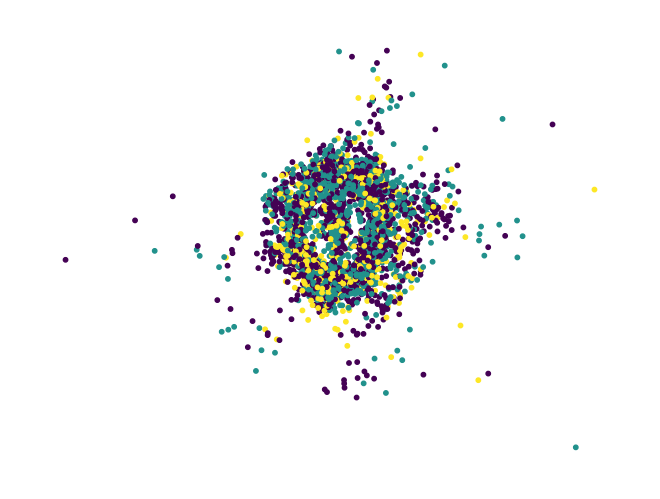

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from networkx.algorithms.community import greedy_modularity_communities

# Create a bipartite graph
G = nx.Graph()
G.add_nodes_from(all_members, bipartite=0)
G.add_nodes_from(all_purchases, bipartite=1)
G.add_edges_from([(row['member_id'], row['item']) for idx, row in analysis_df.iterrows()])

# Project the bipartite graph onto one set of nodes (e.g., set 1)
B = bipartite.projected_graph(G, all_members)

# Perform community detection using greedy modularity maximization
communities = greedy_modularity_communities(B)

# Convert communities to a dictionary for visualization
community_dict = {}
for i, com in enumerate(communities):
    for node in com:
        community_dict[node] = i

# Visualize the communities
pos = nx.spring_layout(B)
colors = [community_dict[node] for node in B.nodes()]

node_size = 10  # Set the size of the nodes
edge_color = 'white'  # Set the color of the edges

# Draw the bipartite graph
nx.draw(B, pos, node_color=colors, with_labels=False, node_size=node_size, edge_color=edge_color)
plt.show()


In [ ]:
def get_cluster(row):
  return community_dict[row["member_id"]]

analysis_df['cluster_no'] = analysis_df.apply(get_cluster, axis=1)
analysis_df.head()

,member_id,item,count,item_category,cluster_no
0,1000,canned beer,1,Beverages,0
1,1000,hygiene articles,1,Household and Pet,0
2,1000,misc. beverages,1,Beverages,0
3,1000,pastry,1,Bakery and Cereals,0
4,1000,pickled vegetables,1,Miscellaneous,0


In [ ]:
set_df = analysis_df[["item_category","cluster_no","member_id"]].drop_duplicates()

set_df = set_df.groupby(["item_category","cluster_no"]).count().rename(columns={'member_id': 'count'}).reset_index()

pivot_df = set_df.pivot_table(index='cluster_no', columns='item_category', values='count', aggfunc='sum')

pivot_df.head()

item_category,Bakery and Cereals,Beverages,Dairy and Eggs,Fresh Produce,Frozen and Refrigerated,Household and Pet,Meats and Seafood,Miscellaneous,Pantry and Dry Goods
cluster_no,,,,,,,,,
0,962,1155,1234,1195,338,742,792,922,894
1,981,997,1384,1170,370,697,973,1096,934
2,481,395,551,588,172,318,335,272,393


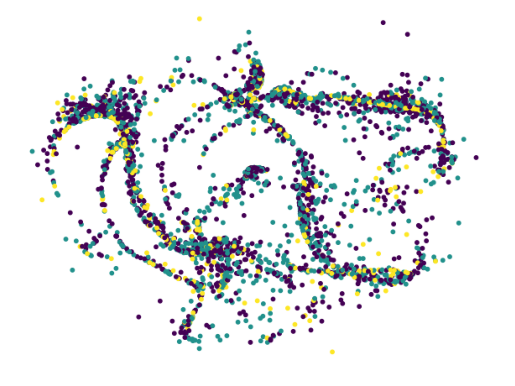

In [ ]:
# Read the PNG file
image = plt.imread('SMA_Network_Plot.png')

# Display the plot
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
def get_cluster_neighbour(row):
  return community_dict[row["Highest_Intersection_With"]]

def get_cluster_member(row):
  return community_dict[row["Member_ID"]]

intersection_difference_df['member_cluster_no'] = intersection_difference_df.apply(get_cluster_member, axis=1)
intersection_difference_df['neighbour_cluster_no'] = intersection_difference_df.apply(get_cluster_neighbour, axis=1)

intersection_difference_df.head()

,Member_ID,Highest_Intersection_With,Difference_Items,member_cluster_no,neighbour_cluster_no
0,1000,2394,"[hamburger meat, decalcifier, nuts/prunes, dom...",0,0
1,1001,1366,"[flour, brown bread, bottled water, sweet spre...",1,2
2,1002,4303,"[specialty bar, instant coffee, semi-finished ...",2,0
3,1003,1026,"[pickled vegetables, citrus fruit, dessert, ca...",0,1
4,1004,2694,"[hard cheese, sausage, ham, bottled beer, pot ...",2,0


In [ ]:
total_match = 0
total_case = 0

for i in range(len(df_10_percent)):

  test_member_id = df_10_percent["member_id"].iloc[i]

  if test_member_id in intersection_difference_df["Member_ID"].tolist():
    total_case = total_case + 1
    mask = intersection_difference_df["Member_ID"]==test_member_id
    if (intersection_difference_df[mask]["member_cluster_no"].tolist()[0]!=intersection_difference_df[mask]["neighbour_cluster_no"].tolist()[0]):
      total_match = total_match + 1

print(total_match/total_case)

0.5766129032258065
